<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Text(0, 0.5, 'Count')

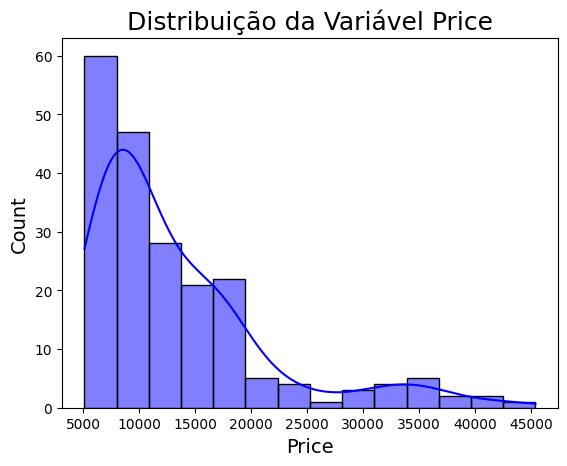

In [6]:
# Importação de Bibliotecas
import pandas as pd
import seaborn as sns

# Leitura de Dataset - Car Price Assingment, do Kaggle
df = pd.read_csv("CarPrice_Assignment.csv",sep=",") 

# Data Understanding - Compreensão dos Dados
df.head()
df.info()
df.describe()
df.describe(include='O')
list(df.carbody.unique())
print(df['carbody'].value_counts())
print(df['fuelsystem'].value_counts())


# Data Preparation - Preparação dos Dados (Limpeza, por exemplo)

df.isnull().sum() # para totalizar os valores nulos em cada feature (variável)


df[df.duplicated(keep='first')] # para identificar linhas duplicadas
# df.drop_duplicates(keep='first',inplace=True) - remove linhas duplicadas, se houver


# Data Visualization

# Distribuição da Variável Price
fig = sns.histplot(data=df, x = 'price', kde=True, color='b')
fig.set_title('Distribuição da Variável Price',size=18)
fig.set_xlabel('Price', size=14)
fig.set_ylabel('Count', size=14)


Text(0, 0.5, 'Count')

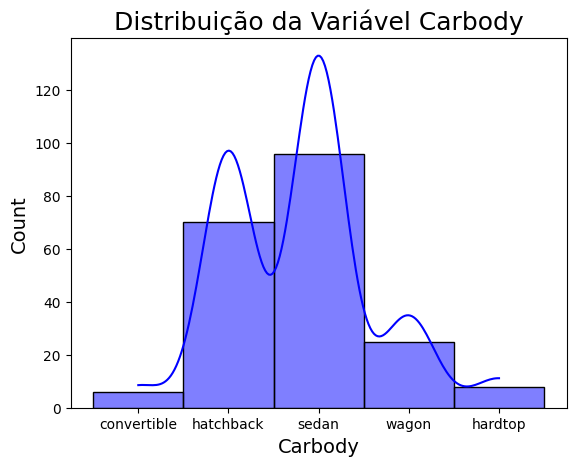

In [9]:
# Distribuição da Variável Carbody

fig = sns.histplot(data=df, x = 'carbody', kde=True, color='b')
fig.set_title('Distribuição da Variável Carbody',size=18)
fig.set_xlabel('Carbody', size=14)
fig.set_ylabel('Count', size=14)

Text(0, 0.5, 'Count')

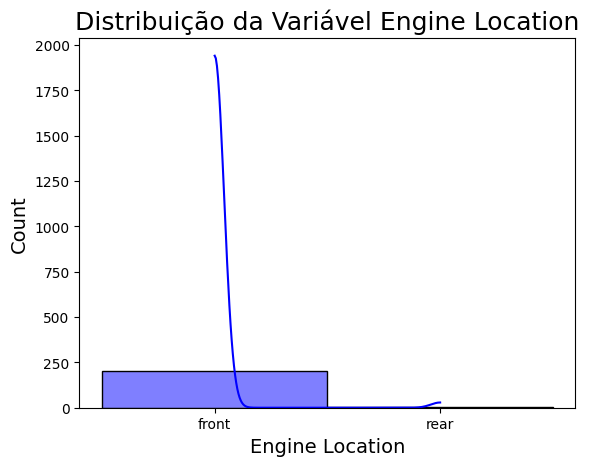

In [10]:
# Distribuição da Variável EngineLocation

fig = sns.histplot(data=df, x = 'enginelocation', kde=True, color='b')
fig.set_title('Distribuição da Variável Engine Location',size=18)
fig.set_xlabel('Engine Location', size=14)
fig.set_ylabel('Count', size=14)


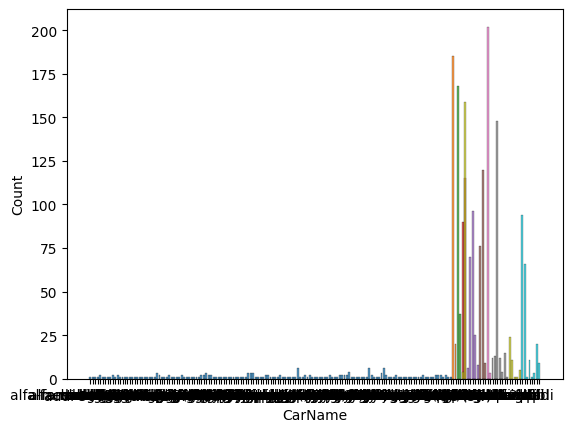

In [15]:
# Contagem de Ocorrências de Valores Categóricos - CarName

df_categorical = df.select_dtypes(include = 'object').columns
for i in df_categorical:
    fig = sns.histplot(data=df, x = i, shrink=.8)

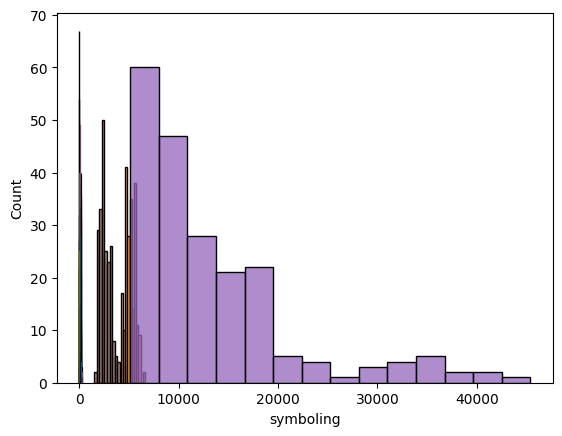

In [18]:
# Contagem de Ocorrências de Valores Numéricos

df_numerical = df.select_dtypes(exclude = 'object').columns

for i in df_numerical:
    fig = sns.histplot(data=df, x = i)

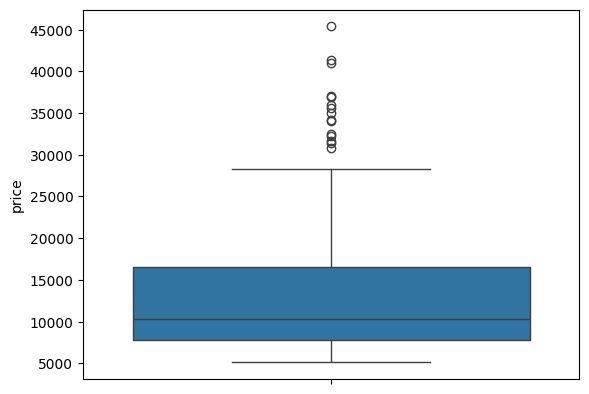

In [19]:
# Boxplot o atributo price
fig = sns.boxplot(data=df, y = 'price')

<Axes: >

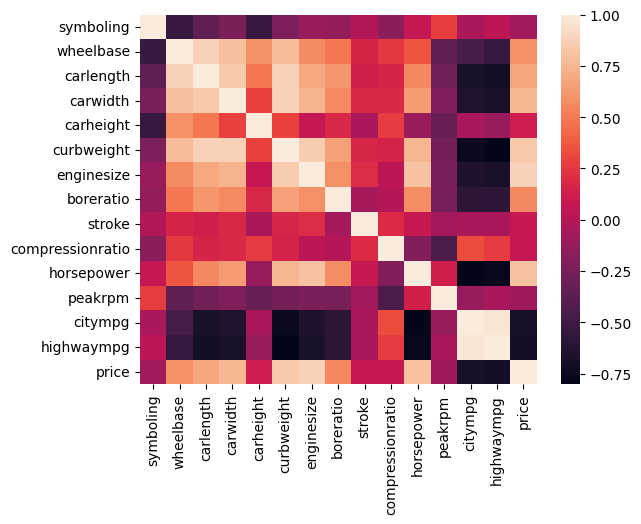

In [23]:
# Gráfico de Calor (heatmap) de todos os atributos
# Correlação entre atributos - quanto mais clara a cor (mais perto do valor 1.0), mais alta a correlação

# Seleciona apenas colunas numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(df_numeric.corr())


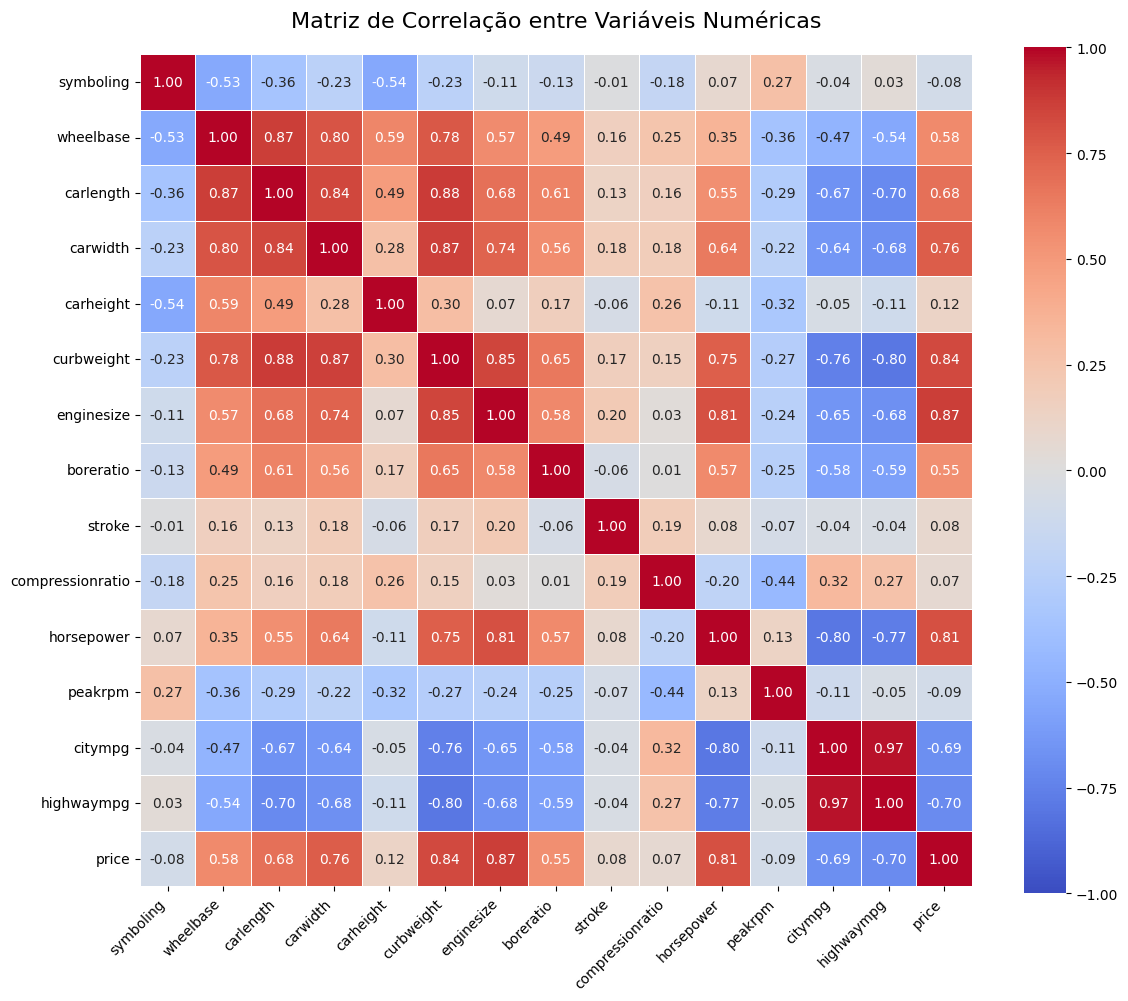

In [25]:
plt.figure(figsize=(12, 10))  # Tamanho da figura

# Cálculo da correlação
corr_matrix = df_numeric.corr()

# Heatmap com customizações
sns.heatmap(
    corr_matrix,
    annot=True,            # Mostra valores dentro dos quadrados
    fmt=".2f",             # Formato com 2 casas decimais
    cmap='coolwarm',       # Mapa de cores (azul para negativo, vermelho para positivo)
    center=0,              # Centraliza o branco no zero
    vmin=-1, vmax=1,       # Limites fixos para a escala de cores
    linewidths=0.5,        # Linhas finas entre as células
    linecolor='white',     # Cor das linhas divisórias
    square=True            # Mantém as células quadradas
)

# Customizações adicionais
plt.title('Matriz de Correlação entre Variáveis Numéricas', pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rótulos do eixo X em 45 graus
plt.yticks(rotation=0)               # Rótulos do eixo Y horizontais
plt.tight_layout()                   # Ajuste automático do layout
plt.show()

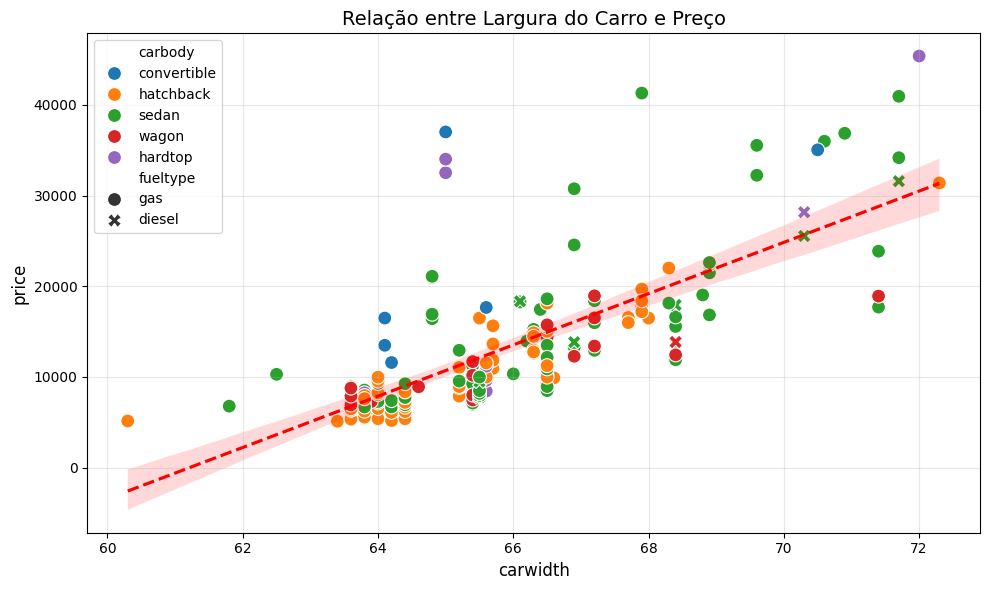

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carwidth', y='price', hue='carbody', style='fueltype', s=100)
plt.title('Relação entre Largura do Carro e Preço', fontsize=14)
plt.xlabel('Largura do Carro (cm)', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Adiciona linha de tendência
sns.regplot(data=df, x='carwidth', y='price', scatter=False, color='red', line_kws={'linestyle':'--'})
plt.show()

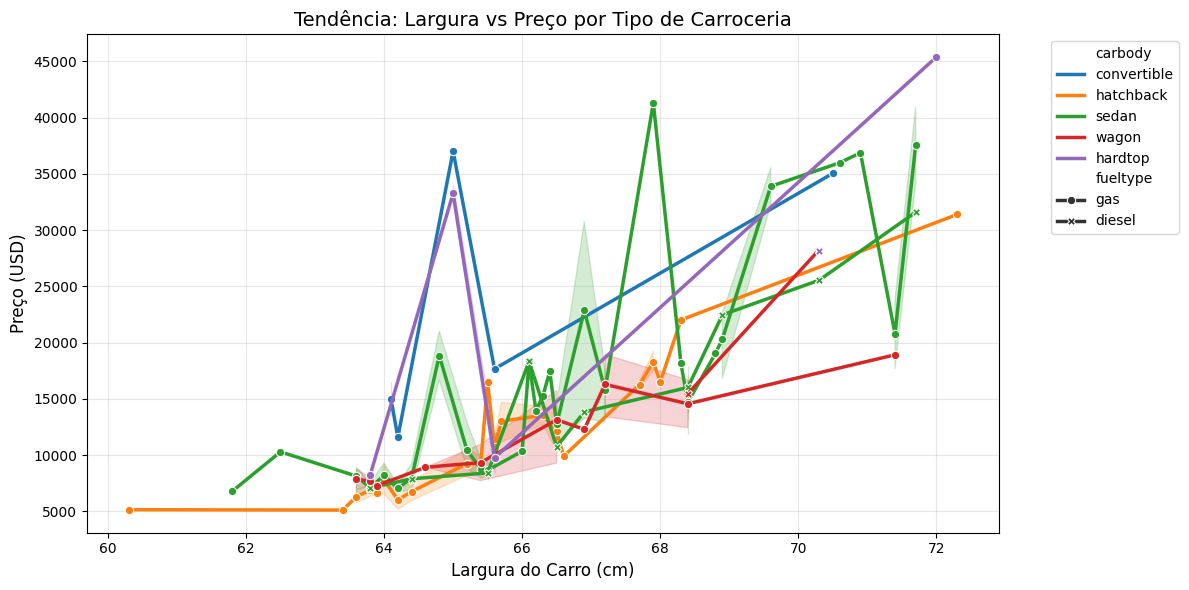

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='carwidth', y='price', hue='carbody', style='fueltype', 
             markers=True, dashes=False, linewidth=2.5)
plt.title('Tendência: Largura vs Preço por Tipo de Carroceria', fontsize=14)
plt.xlabel('Largura do Carro (cm)', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

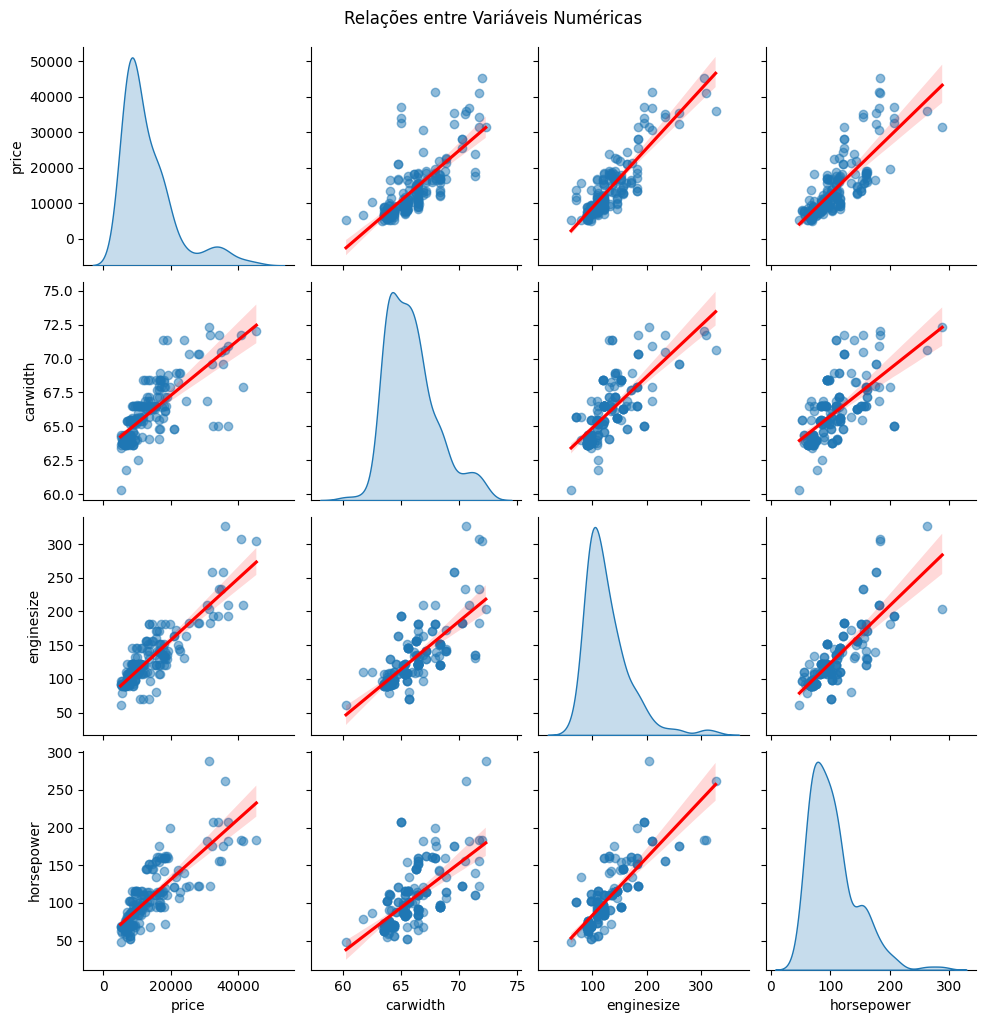

In [33]:
sns.pairplot(df[['price', 'carwidth', 'enginesize', 'horsepower']], 
             kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})
plt.suptitle('Relações entre Variáveis Numéricas', y=1.02)
plt.show()

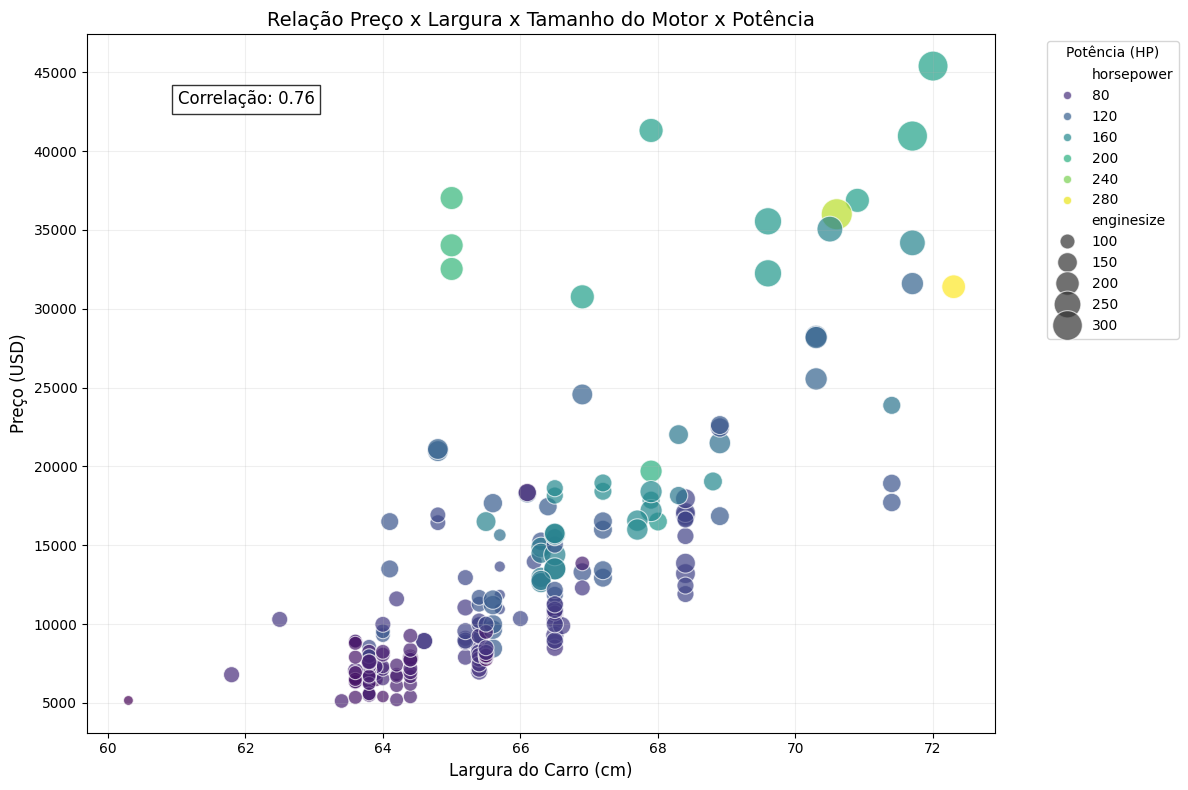

In [34]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x='carwidth', y='price', 
                          size='enginesize', hue='horsepower',
                          sizes=(50, 500), alpha=0.7, palette='viridis')

plt.title('Relação Preço x Largura x Tamanho do Motor x Potência', fontsize=14)
plt.xlabel('Largura do Carro (cm)', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)

# Ajusta a legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Potência (HP)')

# Adiciona valor de correlação no gráfico
corr = df[['price', 'carwidth']].corr().iloc[0,1]
plt.text(0.1, 0.9, f'Correlação: {corr:.2f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()